# Dataset
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
## Some explanation

In [205]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/dataset.csv')
print(df.columns,len(df.columns))
print(df.head())


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object') 35
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Devel

# Preprocessing
## Dropping columns (explanation)

In [206]:

df2 = df.drop(['EducationField','EmployeeCount','EmployeeNumber','StockOptionLevel','YearsWithCurrManager','TrainingTimesLastYear',
            'HourlyRate','DailyRate','PercentSalaryHike','YearsAtCompany','MonthlyRate','StandardHours',
            'NumCompaniesWorked','Over18','YearsSinceLastPromotion','StandardHours','JobInvolvement','JobRole','RelationshipSatisfaction',
            'Department','YearsInCurrentRole'], axis= 1)
print(df2.columns,len(df2.columns))




Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'OverTime', 'PerformanceRating',
       'TotalWorkingYears', 'WorkLifeBalance'],
      dtype='object') 15


## Discretization (explanation)
(note): in the dataset there are not values equals to 1 and 2 for PerformanceRating
nella cella successiva più che una discretizzazione è un mapping anche perchè la suddivisione è già data dal dataset
Questo è un mapping perchè viengono dati dal dataset questi valori.
Quelli dopo sono valori di discretizzazione assegnati da noi

In [207]:
map_ed =  {1: 'Below_college',2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
map_sat = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very_high'}
map_rat = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
map_life = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

def mapping(x,map):
    if x in map.keys():
        return map[x]
    raise Exception

df2['Education'] = df['Education'].apply(lambda x: mapping(x,map_ed))
df2['JobSatisfaction'] = df['JobSatisfaction'].apply(lambda x: mapping(x,map_sat))
df2['PerformanceRating'] = df['PerformanceRating'].apply(lambda x: mapping(x,map_rat))
df2['WorkLifeBalance'] = df['WorkLifeBalance'].apply(lambda x: mapping(x,map_life))


print("New values for Education: ",np.unique(df2['Education']))
print("New values for JobSatisfaction: ",np.unique(df2['JobSatisfaction']))
print("New values for PerformanceRating: ",np.unique(df2['PerformanceRating']))
print("New values for WorkLifeBalance: ",np.unique(df2['WorkLifeBalance']))

New values for Education:  ['Bachelor' 'Below_college' 'College' 'Doctor' 'Master']
New values for JobSatisfaction:  ['High' 'Low' 'Medium' 'Very_high']
New values for PerformanceRating:  ['Excellent' 'Outstanding']
New values for WorkLifeBalance:  ['Bad' 'Best' 'Better' 'Good']


array([[<AxesSubplot:title={'center':'JobLevel'}>]], dtype=object)

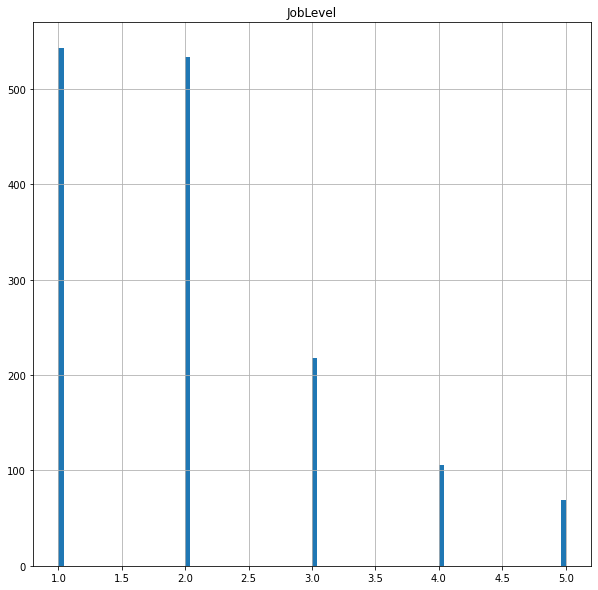

In [208]:
df.hist("JobLevel", bins=100, figsize=(10,10))

Ho provato questa suddivisione visto che il livello 4 e 5 sono pochi
Se hai più creatività si possono mettere valori più esplicativi

In [209]:
level = {1: 'Technician', 2: 'Rappresentative', 3: 'Director', 4: 'Manager', 5: 'Manager'}
df2['JobLevel'] = df['JobLevel'].apply(lambda x: mapping(x,level))
print(np.unique(df2["JobLevel"], return_counts=True)[0])
print(np.unique(df2["JobLevel"], return_counts=True)[1])

['Director' 'Manager' 'Rappresentative' 'Technician']
[218 175 534 543]


## We decide to discretize age....
si possono usare suddivisioni di intervalli diversi, ci dobbiamo basare sulla distribuzione dei dati dell'età
l'idea è fare <25, 26-39, 40-49, >50
nel codice ho fatto diversamente

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

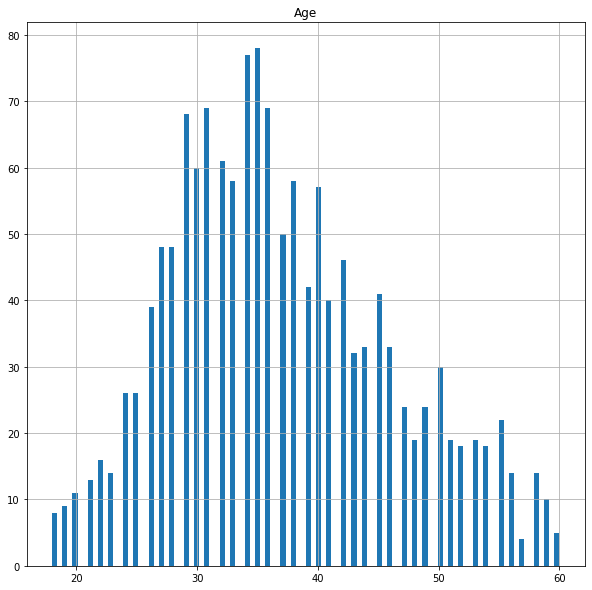

In [210]:
df.hist("Age", bins=100, figsize=(10,10))

In [211]:
def discretize_age(x):
    if x < 20:
        return '<20'
    if x < 30:
        return '20-29'
    if x < 40:
        return '30-39'
    if x < 50:
        return '40-49'
    return '>50'

df2['Age'] = df['Age'].apply(lambda x: discretize_age(x))
print("New values for age:")
print(np.unique(df2["Age"], return_counts=True)[0])
print(np.unique(df2["Age"], return_counts=True)[1])

New values for age:
['20-29' '30-39' '40-49' '<20' '>50']
[309 622 349  17 173]


array([[<AxesSubplot:title={'center':'DistanceFromHome'}>]], dtype=object)

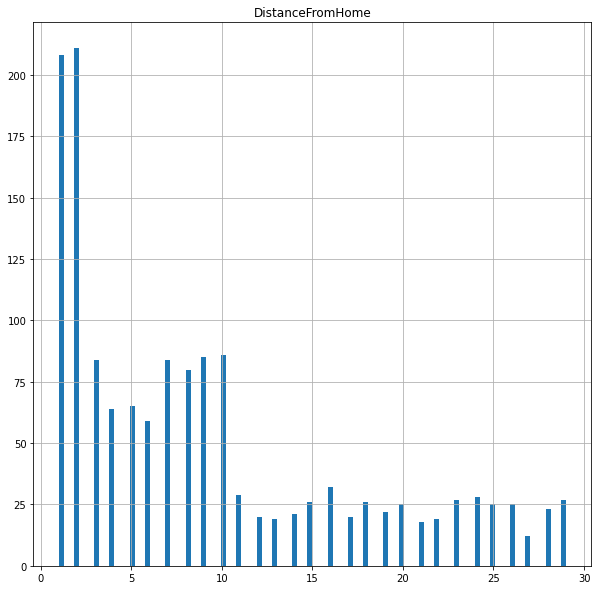

In [212]:
df.hist("DistanceFromHome", bins=100, figsize=(10,10))

La distribuzione dei dati fa un po' schifo
Penso che a logica la suddivisione migliore è la seguente

In [213]:
def discretize_distance(x):
    if x < 10:
        return 'short'
    if x < 20:
        return 'medium'
    return 'long'
    

df2['DistanceFromHome'] = df['DistanceFromHome'].apply(lambda x: discretize_distance(x))
print("New values for DistanceFromHome:")
print(np.unique(df2["DistanceFromHome"], return_counts=True)[0])
print(np.unique(df2["DistanceFromHome"], return_counts=True)[1])

New values for DistanceFromHome:
['long' 'medium' 'short']
[229 301 940]


array([[<AxesSubplot:title={'center':'TotalWorkingYears'}>]], dtype=object)

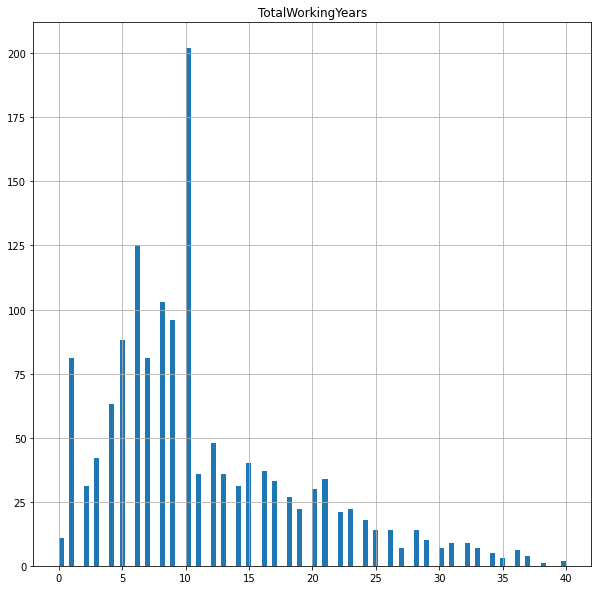

In [214]:
df.hist("TotalWorkingYears", bins=100, figsize=(10,10))

Anche qui la distribuzione dei dati fa un po' cagare
Ho cercato di rendere gli intervalli più equi possibili
Possiamo cambiare anche nomi tipo 'entry level', 'good experience'..

In [215]:
def discretize_experience(x):
    if x < 5:
        return '<5'
    if x < 10:
        return '<10'
    if x < 15:
        return '10-14'
    if x < 20:
        return '15-19'
    return '>20'
    

df2['TotalWorkingYears'] = df['TotalWorkingYears'].apply(lambda x: discretize_experience(x))
print("New values for DistanceFromHome:")
print(np.unique(df2["TotalWorkingYears"], return_counts=True)[0])
print(np.unique(df2["TotalWorkingYears"], return_counts=True)[1])

New values for DistanceFromHome:
['10-14' '15-19' '<10' '<5' '>20']
[353 159 493 228 237]


funzione di discretizzazione basato sul quantile

array([[<AxesSubplot:title={'center':'MonthlyIncome'}>]], dtype=object)

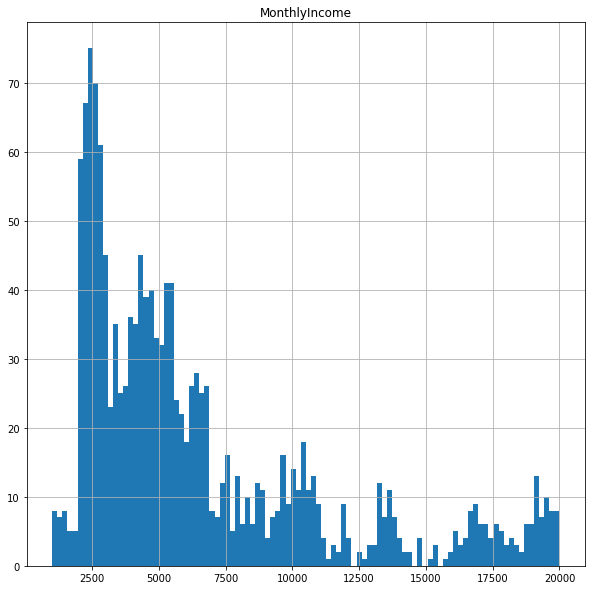

In [216]:
df.hist("MonthlyIncome", bins=100, figsize=(10,10))

In [217]:
df2["MonthlyIncome"] =  pd.qcut(df['MonthlyIncome'], 3, labels=["lower", "on_average", "higher"])
print("New unique values for Total_income:")
print(np.unique(df2["MonthlyIncome"], return_counts=True)[0])
print(np.unique(df2["MonthlyIncome"], return_counts=True)[1])

New unique values for Total_income:
['higher' 'lower' 'on_average']
[490 490 490]


# Explainability

In [218]:
df2["Gender"] = df["Gender"].apply(lambda x: "M" if x else "F")

In [219]:
print(df2.head())
print(len(df2.columns))

     Age Attrition     BusinessTravel DistanceFromHome      Education  \
0  40-49       Yes      Travel_Rarely            short        College   
1  40-49        No  Travel_Frequently            short  Below_college   
2  30-39       Yes      Travel_Rarely            short        College   
3  30-39        No  Travel_Frequently            short         Master   
4  20-29        No      Travel_Rarely            short  Below_college   

   EnvironmentSatisfaction Gender         JobLevel JobSatisfaction  \
0                        2      M  Rappresentative       Very_high   
1                        3      M  Rappresentative          Medium   
2                        4      M       Technician            High   
3                        4      M       Technician            High   
4                        1      M       Technician          Medium   

  MaritalStatus MonthlyIncome OverTime PerformanceRating TotalWorkingYears  \
0        Single    on_average      Yes         Excellent      

In [220]:
df2.to_csv('data/cleaning_dataset.csv', index=False)